<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.827428,-0.244185,52.583243,52.819177,-0.235934
1,0.0,1.0,46.454591,-0.285039,56.169553,56.441964,-0.272412
2,0.0,2.0,46.629474,0.297216,56.926690,56.616636,0.310054
3,0.0,3.0,74.215755,-0.196895,84.018860,84.169638,-0.150778
4,0.0,4.0,29.825004,-0.512357,39.312647,39.832438,-0.519791
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.256459,0.181679,44.438139,44.198121,0.240018
59996,999.0,56.0,37.176047,0.073894,47.249941,47.123346,0.126595
59997,999.0,57.0,90.300330,-0.045888,100.254441,100.350207,-0.095765
59998,999.0,58.0,20.199463,0.288681,30.488144,30.113981,0.374162


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.827428,-0.244185,52.583243,52.819177,-0.235934
1,0.0,1.0,46.454591,-0.285039,56.169553,56.441964,-0.272412
2,0.0,2.0,46.629474,0.297216,56.926690,56.616636,0.310054
3,0.0,3.0,74.215755,-0.196895,84.018860,84.169638,-0.150778
4,0.0,4.0,29.825004,-0.512357,39.312647,39.832438,-0.519791
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.256459,0.181679,44.438139,44.198121,0.240018
59996,999.0,56.0,37.176047,0.073894,47.249941,47.123346,0.126595
59997,999.0,57.0,90.300330,-0.045888,100.254441,100.350207,-0.095765
59998,999.0,58.0,20.199463,0.288681,30.488144,30.113981,0.374162


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.827428 -0.244185   52.583243   52.819177 -0.235934
      1.0    46.454591 -0.285039   56.169553   56.441964 -0.272412
      2.0    46.629474  0.297216   56.926690   56.616636  0.310054
      3.0    74.215755 -0.196895   84.018860   84.169638 -0.150778
      4.0    29.825004 -0.512357   39.312647   39.832438 -0.519791
...                ...       ...         ...         ...       ...
999.0 55.0   34.256459  0.181679   44.438139   44.198121  0.240018
      56.0   37.176047  0.073894   47.249941   47.123346  0.126595
      57.0   90.300330 -0.045888  100.254441  100.350207 -0.095765
      58.0   20.199463  0.288681   30.488144   30.113981  0.374162
      59.0   70.509847 -0.032999   80.476848   80.521510 -0.044662

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.827428 -0.244185   52.583243   52.819177 -0.235934
      1.0    46.454591 -0.285039   56.169553   56.441964 -0.272412
      2.0    46.629474  0.297216   56.926690   56.616636  0.310054
      3.0    74.215755 -0.196895   84.018860   84.169638 -0.150778
      4.0    29.825004 -0.512357   39.312647   39.832438 -0.519791
...                ...       ...         ...         ...       ...
999.0 55.0   34.256459  0.181679   44.438139   44.198121  0.240018
      56.0   37.176047  0.073894   47.249941   47.123346  0.126595
      57.0   90.300330 -0.045888  100.254441  100.350207 -0.095765
      58.0   20.199463  0.288681   30.488144   30.113981  0.374162
      59.0   70.509847 -0.032999   80.476848   80.521510 -0.044662

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.827428,-0.244185,52.583243,52.819177,-0.235934
1,0.0,1.0,46.454591,-0.285039,56.169553,56.441964,-0.272412
2,0.0,2.0,46.629474,0.297216,56.926690,56.616636,0.310054
3,0.0,3.0,74.215755,-0.196895,84.018860,84.169638,-0.150778
4,0.0,4.0,29.825004,-0.512357,39.312647,39.832438,-0.519791
...,...,...,...,...,...,...,...
59995,999.0,55.0,34.256459,0.181679,44.438139,44.198121,0.240018
59996,999.0,56.0,37.176047,0.073894,47.249941,47.123346,0.126595
59997,999.0,57.0,90.300330,-0.045888,100.254441,100.350207,-0.095765
59998,999.0,58.0,20.199463,0.288681,30.488144,30.113981,0.374162


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    42.827428 -0.244185   52.583243   52.819177 -0.235934
      1.0    46.454591 -0.285039   56.169553   56.441964 -0.272412
      2.0    46.629474  0.297216   56.926690   56.616636  0.310054
      3.0    74.215755 -0.196895   84.018860   84.169638 -0.150778
      4.0    29.825004 -0.512357   39.312647   39.832438 -0.519791
...                ...       ...         ...         ...       ...
999.0 55.0   34.256459  0.181679   44.438139   44.198121  0.240018
      56.0   37.176047  0.073894   47.249941   47.123346  0.126595
      57.0   90.300330 -0.045888  100.254441  100.350207 -0.095765
      58.0   20.199463  0.288681   30.488144   30.113981  0.374162
      59.0   70.509847 -0.032999   80.476848   80.521510 -0.044662

[60000 rows x 5 columns]

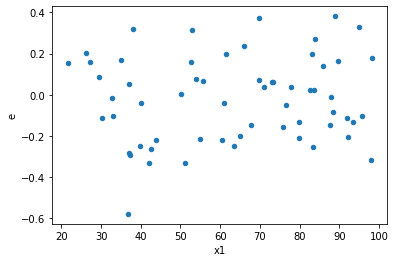

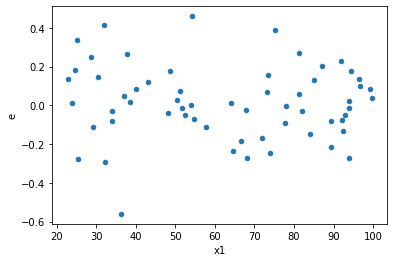

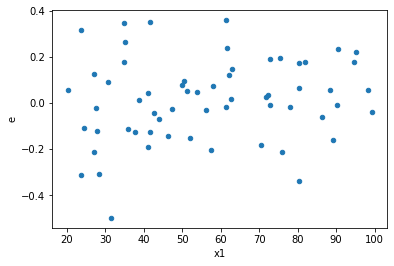

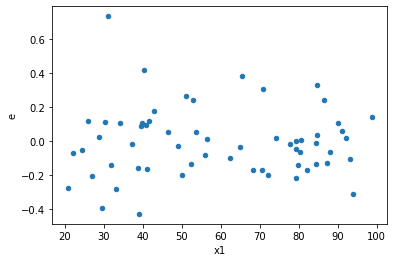

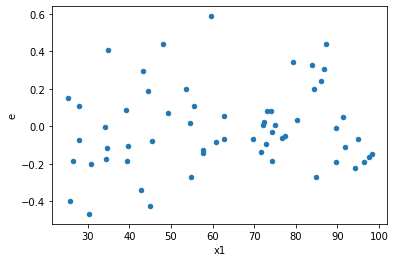

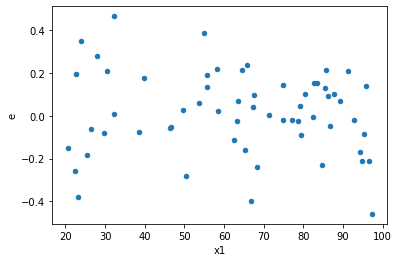

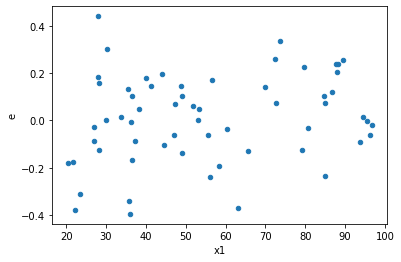

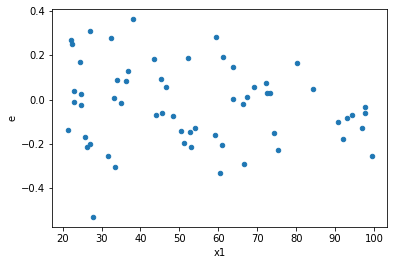

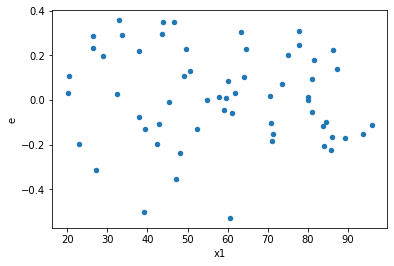

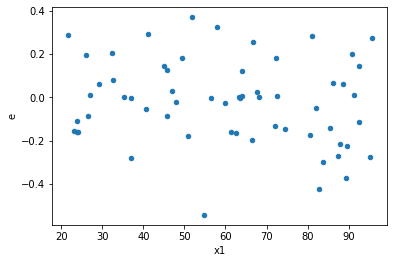

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,23.0,23.0,0.9546650296520737,0.9830495141456718,0.041507175202264074,0.042741283223724856,1.0297324020593304,0.9445948675571998,0.5277025662214001,0.4722974337785999,Reject005=1 : Homoscedasticity
19.0,23.0,23.0,0.6325455475573704,0.9102532071961222,0.02750198032858132,0.0395762263998314,1.4390318779590563,0.3892382757834063,0.8053808621082968,0.19461913789170315,Reject005=1 : Homoscedasticity
20.0,23.0,23.0,0.8806058718500154,0.9476726555327274,0.03828721181956589,0.04120315893620554,1.0761598188549608,0.861800141100306,0.569099929449847,0.430900070550153,Reject005=1 : Homoscedasticity
25.0,23.0,23.0,0.9184417078254927,0.9407011463400434,0.03993224816632577,0.04090004984087146,1.024236092856946,0.9547031032280211,0.5226484483859895,0.47735155161401055,Reject005=1 : Homoscedasticity
51.0,23.0,23.0,0.7809638142285181,1.0082789733877675,0.03395494844471818,0.043838216234250764,1.291070027852449,0.5450684381412749,0.7274657809293625,0.27253421907063746,Reject005=1 : Homoscedasticity
103.0,23.0,23.0,0.9869275869220254,1.1970553596172406,0.042909895083566324,0.05204588520074959,1.21291103367629,0.6473112321146091,0.6763443839426955,0.32365561605730453,Reject005=1 : Homoscedasticity
120.0,23.0,23.0,0.5826081659574655,0.8311494205622215,0.02533078982423763,0.03613693132879224,1.4266010487448288,0.4005815917087516,0.7997092041456242,0.2002907958543758,Reject005=1 : Homoscedasticity
131.0,23.0,23.0,0.779481079220794,1.0002161243069454,0.03389048170525191,0.04348765757856284,1.2831820437602008,0.5547303198535349,0.7226348400732325,0.27736515992676747,Reject005=1 : Homoscedasticity
159.0,23.0,23.0,0.8947017901671068,1.0141006404712656,0.03890007783335247,0.04409133219440285,1.1334510019051802,0.7664379939302752,0.6167810030348624,0.3832189969651376,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,1.227125347725223,0.37152555434273316,0.05335327598805318,0.016153284971423182,0.30276088341867163,0.005836469782431582,Reject005=0 : Heteroscedasticity
1.0,23.0,23.0,0.9247263659806189,0.5939343801059855,0.040205494173070386,0.025823233917651546,0.6422812217278486,0.2955800021791711,Reject005=1 : Homoscedasticity
2.0,23.0,23.0,1.1844526544452445,0.7767930493977475,0.051497941497619326,0.033773610843380326,0.6558244827114426,0.31875263127377756,Reject005=1 : Homoscedasticity
3.0,23.0,23.0,1.5387333669276324,0.9606975515298926,0.06690145073598401,0.04176945876216924,0.6243430942477735,0.2660099786340016,Reject005=1 : Homoscedasticity
4.0,23.0,23.0,0.7980076666745743,0.7083311121619417,0.03469598550759019,0.03079700487660616,0.8876244449049854,0.7774257509377333,Reject005=1 : Homoscedasticity
5.0,23.0,23.0,1.107497583957327,0.527497305127897,0.04815206886770986,0.02293466544034335,0.4762965741586865,0.08185890445649252,Reject005=1 : Homoscedasticity
6.0,23.0,23.0,1.1764791805526547,0.5605194794437346,0.051151268719680634,0.024370412149727592,0.4764380778760819,0.0819786974695916,Reject005=1 : Homoscedasticity
7.0,23.0,23.0,1.3000256172866058,0.7409142089654283,0.0565228529255046,0.03221366125936644,0.5699227762233281,0.18512714233640545,Reject005=1 : Homoscedasticity
8.0,23.0,23.0,2.2727877621968244,0.6850034661006584,0.09881685922594889,0.029782759395680803,0.3013935033857054,0.0056621952321326986,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      605
Reject005=0 : Heteroscedasticity    395
Name: Result_test, dtype: int64